## Model predicts the type of a pokemon based on its appearence
As input i will use the image of a pokemon. As output we will get a pokemon type

### Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import sys
import numpy as np
from PIL import Image   

In [2]:
print(f'python: {sys.version[0:7]}')  # 3.10.12
print(tf.__version__)  # 2.13.0
print(np.__version__)  # 1.24.3

python: 3.10.12
2.13.0
1.24.3


### Load Data

we need to load 2 datasets
- pokemon types
- pokemon images

pokemon_types but as label

In [8]:
def pokemon_type_to_label(type):
    if type[0] == 'Grass':
        return 0
    elif type[0] == 'Fire':
        return 1
    elif type[0] == 'Water':
        return 2
    elif type[0] == 'Electric':
        return 3
    elif type[0] == 'Ice':
        return 4
    elif type[0] == 'Fighting':
        return 5
    elif type[0] == 'Poison':
        return 6
    elif type[0] == 'Ground':
        return 7
    elif type[0] == 'Flying':
        return 8
    elif type[0] == 'Psychic':
        return 9
    elif type[0] == 'Bug':
        return 10
    elif type[0] == 'Rock':
        return 11
    elif type[0] == 'Ghost':
        return 12
    elif type[0] == 'Steel':
        return 13
    elif type[0] == 'Dragon':
        return 14
    elif type[0] == 'Dark':
        return 15
    elif type[0] == 'Fairy':
        return 16
    elif type[0] == 'Normal':
        return 17
    else:
        'ERROR'


types = ['Grass', 'Fire', 'Water', 'Electric', 'Ice', 'Fighting', 'Poison', 'Ground',
         'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Steel', 'Dragon', 'Dark', 'Fairy', 'Normal']

only primary types because that was easier

In [9]:
import csv

pokemon_primary_types = []
with open('./pokemon_data/pokemon_Type1.csv', newline='') as type1:
    type1_reader = csv.reader(type1, delimiter=' ', quotechar='|')
    for t1 in type1_reader:
        t1 = pokemon_type_to_label(t1)
        pokemon_primary_types.append(t1)
print(len(pokemon_primary_types))
print(pokemon_primary_types[0])  # print first entry

809
0


pokemon images

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
SIZE = (120, 120)

pokemon_images = []
directory = "./pokemon_data/images/"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = load_img(f, target_size=SIZE)
    image = img_to_array(image)
    image = image / 255.0
    # image = Image.open(f)
    pokemon_images.append(image)
print(len(pokemon_images))

809


### Preprocessing Data

also my pokemon types aren't mnumpy arrays yet

In [11]:
pokemon_primary_types = np.array(pokemon_primary_types)


formatting the labels differently so that the neural network can make predictions

In [12]:
from tensorflow.keras.utils import to_categorical

one_hot_labels = to_categorical(pokemon_primary_types, num_classes=18)


### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pokemon_images, one_hot_labels, test_size=0.2, random_state=69)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Create Model

In [14]:
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input, Dropout
from tensorflow.keras import layers
from tensorflow import keras

model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(types), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [15]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
21/21 [==============================] - 23s 986ms/step - loss: 2.8125 - accuracy: 0.1144
Epoch 2/20
21/21 [==============================] - 20s 950ms/step - loss: 2.7370 - accuracy: 0.1484
Epoch 3/20
21/21 [==============================] - 21s 1s/step - loss: 2.7143 - accuracy: 0.1530
Epoch 4/20
21/21 [==============================] - 21s 1s/step - loss: 2.6863 - accuracy: 0.1716
Epoch 5/20
21/21 [==============================] - 21s 1s/step - loss: 2.6306 - accuracy: 0.1762
Epoch 6/20
21/21 [==============================] - 20s 974ms/step - loss: 2.5436 - accuracy: 0.2164
Epoch 7/20
21/21 [==============================] - 20s 967ms/step - loss: 2.3339 - accuracy: 0.2689
Epoch 8/20
21/21 [==============================] - 20s 963ms/step - loss: 2.0496 - accuracy: 0.3555
Epoch 9/20
21/21 [==============================] - 20s 940ms/step - loss: 1.7413 - accuracy: 0.4529
Epoch 10/20
21/21 [==============================] - 16s 750ms/step - loss: 1.3240 - accuracy: 0.561

### Test Model

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

6/6 [==============================] - 1s 133ms/step - loss: 3.0086 - accuracy: 0.1049
Test Loss: 3.0086119174957275, Test Accuracy: 0.10493826866149902


evaluating the results

6/6 [==============================] - 1s 133ms/step


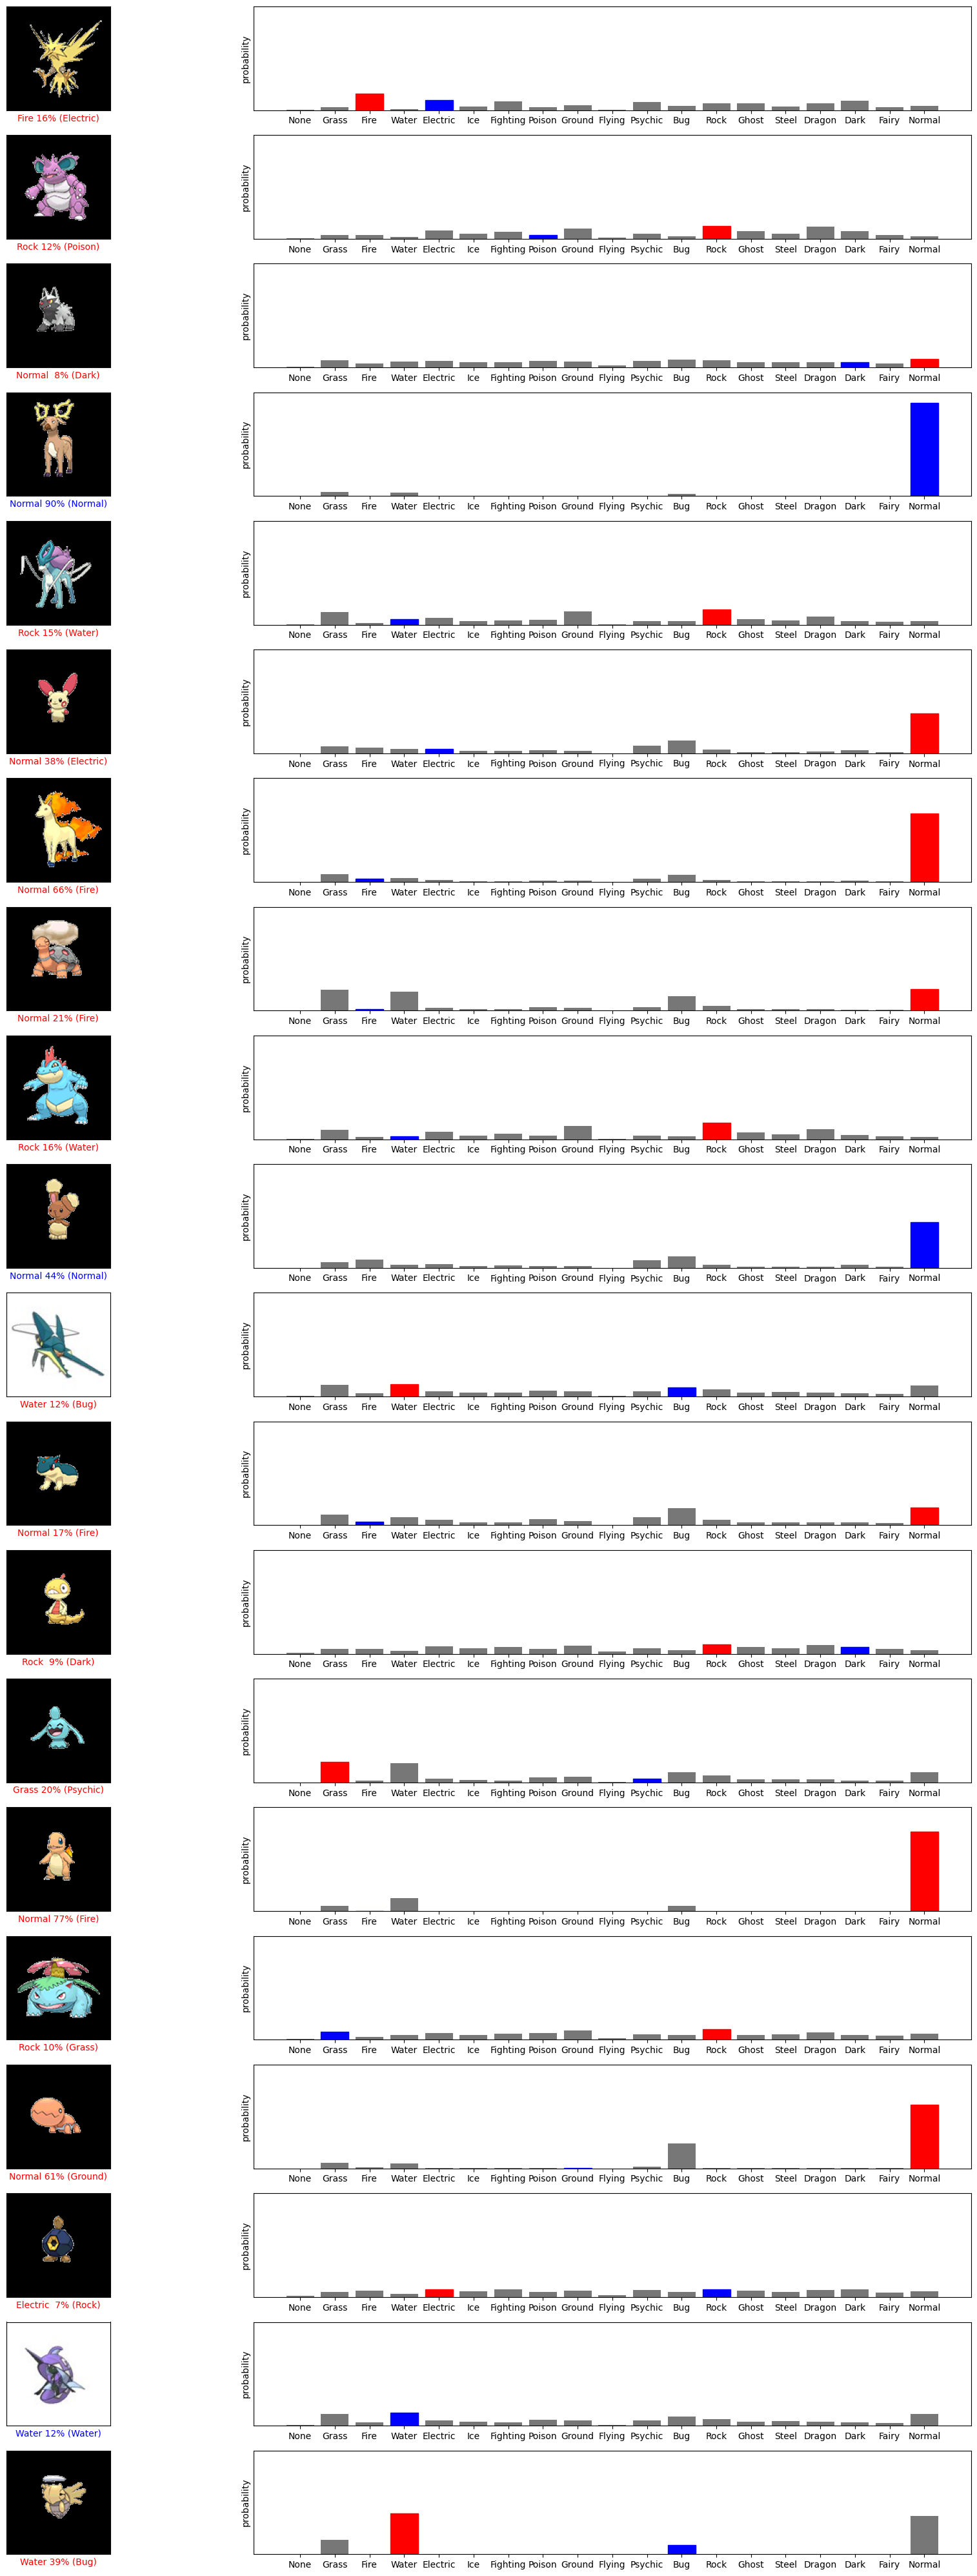

In [15]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(types[predicted_label],
                                       100*np.max(predictions_array),
                                       types[true_label]),
             color=color)


def plot_value_array2(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(18))
  plt.yticks([])
  thisplot = plt.bar(types, predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  true_label = np.argmax(true_label)
  thisplot[true_label].set_color('blue')
  ax = plt.gca()
  ax.set_ylabel('probability')



predictions = model.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 20  # 5
num_cols = 1  # 3
num_images = num_rows*num_cols
plt.figure(figsize=(5*4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array2(i, predictions[i], y_test)

plt.tight_layout()

plt.show()

My model makes pretty logical guesses. we went over the pokemons with a friend who doesn't know pokemon and often they got the same guess which is pretty impressive. so even though the accuracy is so low, its not terrible. 

to improve the model it would be a fun challenge to give both the primary type and the secondary type

we put my model to the test against a human (which is basically trasnfer learning since its trained on the world)

A green V means point for Enikö, Red Cross is a point for the model. Double cross is no one gets points. Enikö still won with 6-5 without anyu training

<img src="./envsmodel.png"/>